In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [2]:
RESULTS_DIR = Path("../results")
FIGURES_DIR = RESULTS_DIR / "figures"
FIGURES_DIR.mkdir(exist_ok=True)


In [3]:
dfs = []

dfs.append(pd.read_csv(RESULTS_DIR / "persistence_mae.csv"))
dfs.append(pd.read_csv(RESULTS_DIR / "gru_motion_mae.csv"))
dfs.append(pd.read_csv(RESULTS_DIR / "cnn_mlp_motion_mae.csv"))
dfs.append(pd.read_csv(RESULTS_DIR / "cnn_mlp_enhanced_mae.csv"))
dfs.append(pd.read_csv(RESULTS_DIR / "gru_fusion_mae.csv"))
dfs.append(pd.read_csv(RESULTS_DIR / "cnn_gru_mae.csv"))


In [4]:
all_results = pd.concat(dfs, ignore_index=True)
all_results.to_csv(RESULTS_DIR / "model_comparison_mae.csv", index=False)

all_results


,model,lead_time,mae_km,mae_lat_deg,mae_lon_deg
0,persistence,6h,36.210000,0.176900,0.235000
1,persistence,12h,75.030000,0.371100,0.491900
2,persistence,24h,159.550000,0.785600,1.074200
3,persistence,48h,339.900000,1.614000,2.354700
4,gru_motion,6h,33.486688,0.166736,0.218714
5,gru_motion,12h,66.363222,0.332792,0.437780
6,gru_motion,24h,147.149830,0.725507,1.003094
7,gru_motion,48h,344.878282,1.596812,2.453609
8,cnn_mlp_motion,6h,37.830000,0.184100,0.255300
9,cnn_mlp_motion,12h,75.280000,0.352600,0.518000


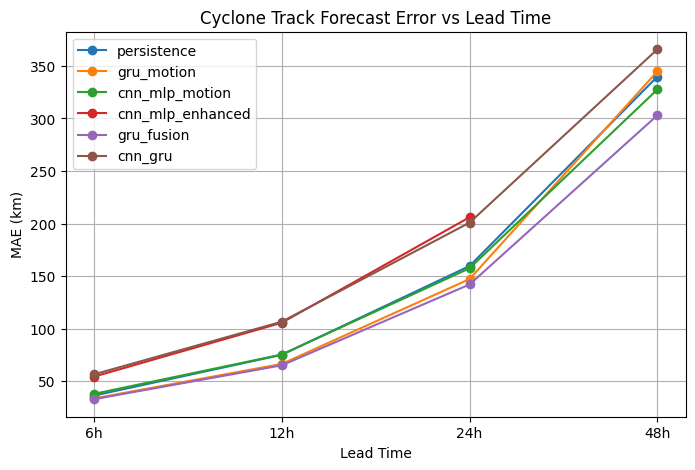

In [5]:
plt.figure(figsize=(8,5))

for model in all_results["model"].unique():
    sub = all_results[all_results["model"] == model]
    plt.plot(sub["lead_time"], sub["mae_km"], marker="o", label=model)

plt.xlabel("Lead Time")
plt.ylabel("MAE (km)")
plt.title("Cyclone Track Forecast Error vs Lead Time")
plt.legend()
plt.grid(True)

plt.savefig(FIGURES_DIR / "mae_vs_lead_time.png", dpi=300)
plt.show()


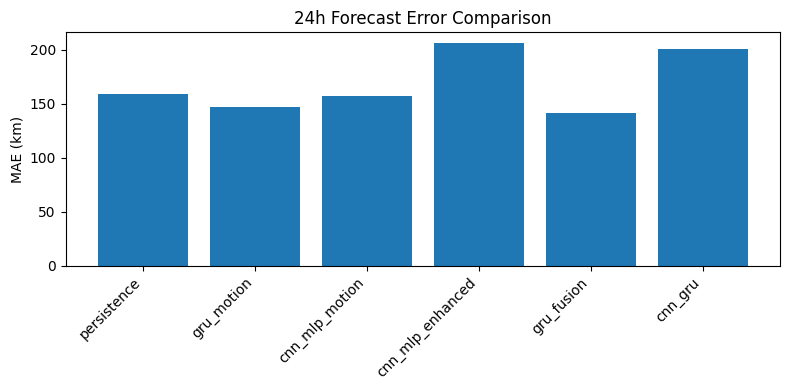

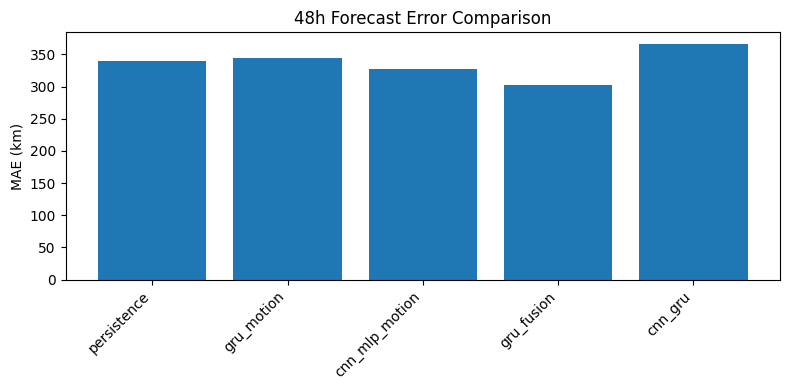

In [6]:
for lt in ["24h", "48h"]:
    sub = all_results[all_results["lead_time"] == lt]

    plt.figure(figsize=(8,4))
    plt.bar(sub["model"], sub["mae_km"])
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("MAE (km)")
    plt.title(f"{lt} Forecast Error Comparison")
    plt.tight_layout()

    plt.savefig(FIGURES_DIR / f"mae_{lt}.png", dpi=300)
    plt.show()


In [7]:
rank_24h = (
    all_results[all_results["lead_time"] == "24h"]
    .sort_values("mae_km")
    .reset_index(drop=True)
)

rank_24h.to_csv(RESULTS_DIR / "model_ranking_24h.csv", index=False)
rank_24h


,model,lead_time,mae_km,mae_lat_deg,mae_lon_deg
0,gru_fusion,24h,141.976427,0.714963,0.947340
1,gru_motion,24h,147.149830,0.725507,1.003094
2,cnn_mlp_motion,24h,157.440000,0.741500,1.092800
3,persistence,24h,159.550000,0.785600,1.074200
4,cnn_gru,24h,200.845018,0.909585,1.398327
5,cnn_mlp_enhanced,24h,205.972380,NaN,NaN
